<a href="https://colab.research.google.com/github/iremuzun/C-Term-Project/blob/main/CNNClassificationCatandDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset
The training archive contains 1000 images of cats and dogs.
The aim is training algorithm on these files and predicting the labels.


Unzip the dataset


In [4]:
!unzip archive.zip


Archive:  archive.zip
replace Dog and Cat .png/Cat/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

Create Dataframe for Input & Output

In [5]:
input_path = []
label = []
for class_name in os.listdir("/content/Dog and Cat .png"):
    for path in os.listdir("/content/Dog and Cat .png/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("/content/Dog and Cat .png", class_name, path))
print(input_path[0], label[0])

/content/Dog and Cat .png/Cat/t94.png 0


In [6]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  /content/Dog and Cat .png/Cat/264.png      0
1  /content/Dog and Cat .png/Cat/244.png      0
2  /content/Dog and Cat .png/Dog/d35.png      1
3  /content/Dog and Cat .png/Cat/288.png      0
4  /content/Dog and Cat .png/Dog/d36.png      1

In [7]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

/content/Dog and Cat .png/Cat/264.png
/content/Dog and Cat .png/Cat/244.png
/content/Dog and Cat .png/Dog/d35.png
/content/Dog and Cat .png/Cat/288.png
/content/Dog and Cat .png/Dog/d36.png
/content/Dog and Cat .png/Dog/d176.png
/content/Dog and Cat .png/Dog/d277.png
/content/Dog and Cat .png/Cat/t46.png
/content/Dog and Cat .png/Cat/t74.png
/content/Dog and Cat .png/Dog/d345.png
/content/Dog and Cat .png/Cat/55.png
/content/Dog and Cat .png/Dog/d308.png
/content/Dog and Cat .png/Cat/282.png
/content/Dog and Cat .png/Dog/d119.png
/content/Dog and Cat .png/Cat/82.png
/content/Dog and Cat .png/Dog/d61.png
/content/Dog and Cat .png/Dog/d325.png
/content/Dog and Cat .png/Dog/d16.png
/content/Dog and Cat .png/Cat/371.png
/content/Dog and Cat .png/Dog/d200.png
/content/Dog and Cat .png/Dog/d54.png
/content/Dog and Cat .png/Cat/287.png
/content/Dog and Cat .png/Dog/d69.png
/content/Dog and Cat .png/Dog/d171.png
/content/Dog and Cat .png/Cat/t93.png
/content/Dog and Cat .png/Dog/d297.png
/cont

In [8]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

/content/Dog and Cat .png/Cat/264.png
/content/Dog and Cat .png/Cat/244.png
/content/Dog and Cat .png/Dog/d35.png
/content/Dog and Cat .png/Cat/288.png
/content/Dog and Cat .png/Dog/d36.png
/content/Dog and Cat .png/Dog/d176.png
/content/Dog and Cat .png/Dog/d277.png
/content/Dog and Cat .png/Cat/t46.png
/content/Dog and Cat .png/Cat/t74.png
/content/Dog and Cat .png/Dog/d345.png
/content/Dog and Cat .png/Cat/55.png
/content/Dog and Cat .png/Dog/d308.png
/content/Dog and Cat .png/Cat/282.png
/content/Dog and Cat .png/Dog/d119.png
/content/Dog and Cat .png/Cat/82.png
/content/Dog and Cat .png/Dog/d61.png
/content/Dog and Cat .png/Dog/d325.png
/content/Dog and Cat .png/Dog/d16.png
/content/Dog and Cat .png/Cat/371.png
/content/Dog and Cat .png/Dog/d200.png
/content/Dog and Cat .png/Dog/d54.png
/content/Dog and Cat .png/Cat/287.png
/content/Dog and Cat .png/Dog/d69.png
/content/Dog and Cat .png/Dog/d171.png
/content/Dog and Cat .png/Cat/t93.png
/content/Dog and Cat .png/Dog/d297.png
/cont

In [35]:
# delete db files
df = df[df['images']!='/content/Dog and Cat .png']
df = df[df['images']!='/content/Dog and Cat .png']
df = df[df['images']!='/content/Dog and Cat .png']
df = df[df['images']!='/content/Dog and Cat .png']
len(df)

1000

Exploratory Data Analysis

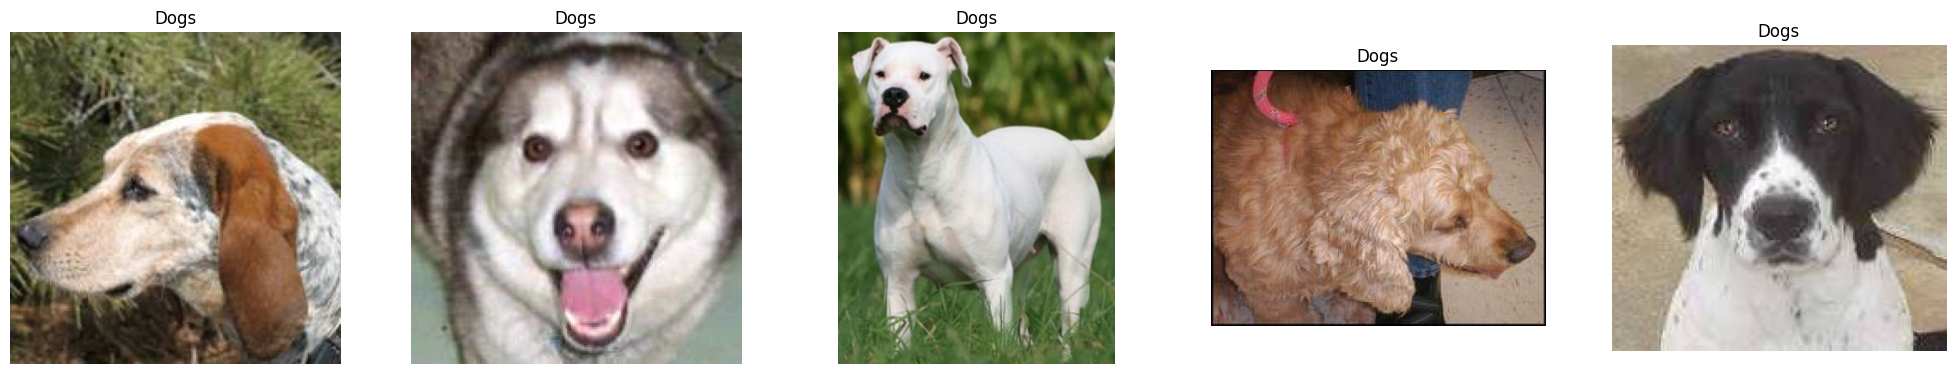

In [10]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

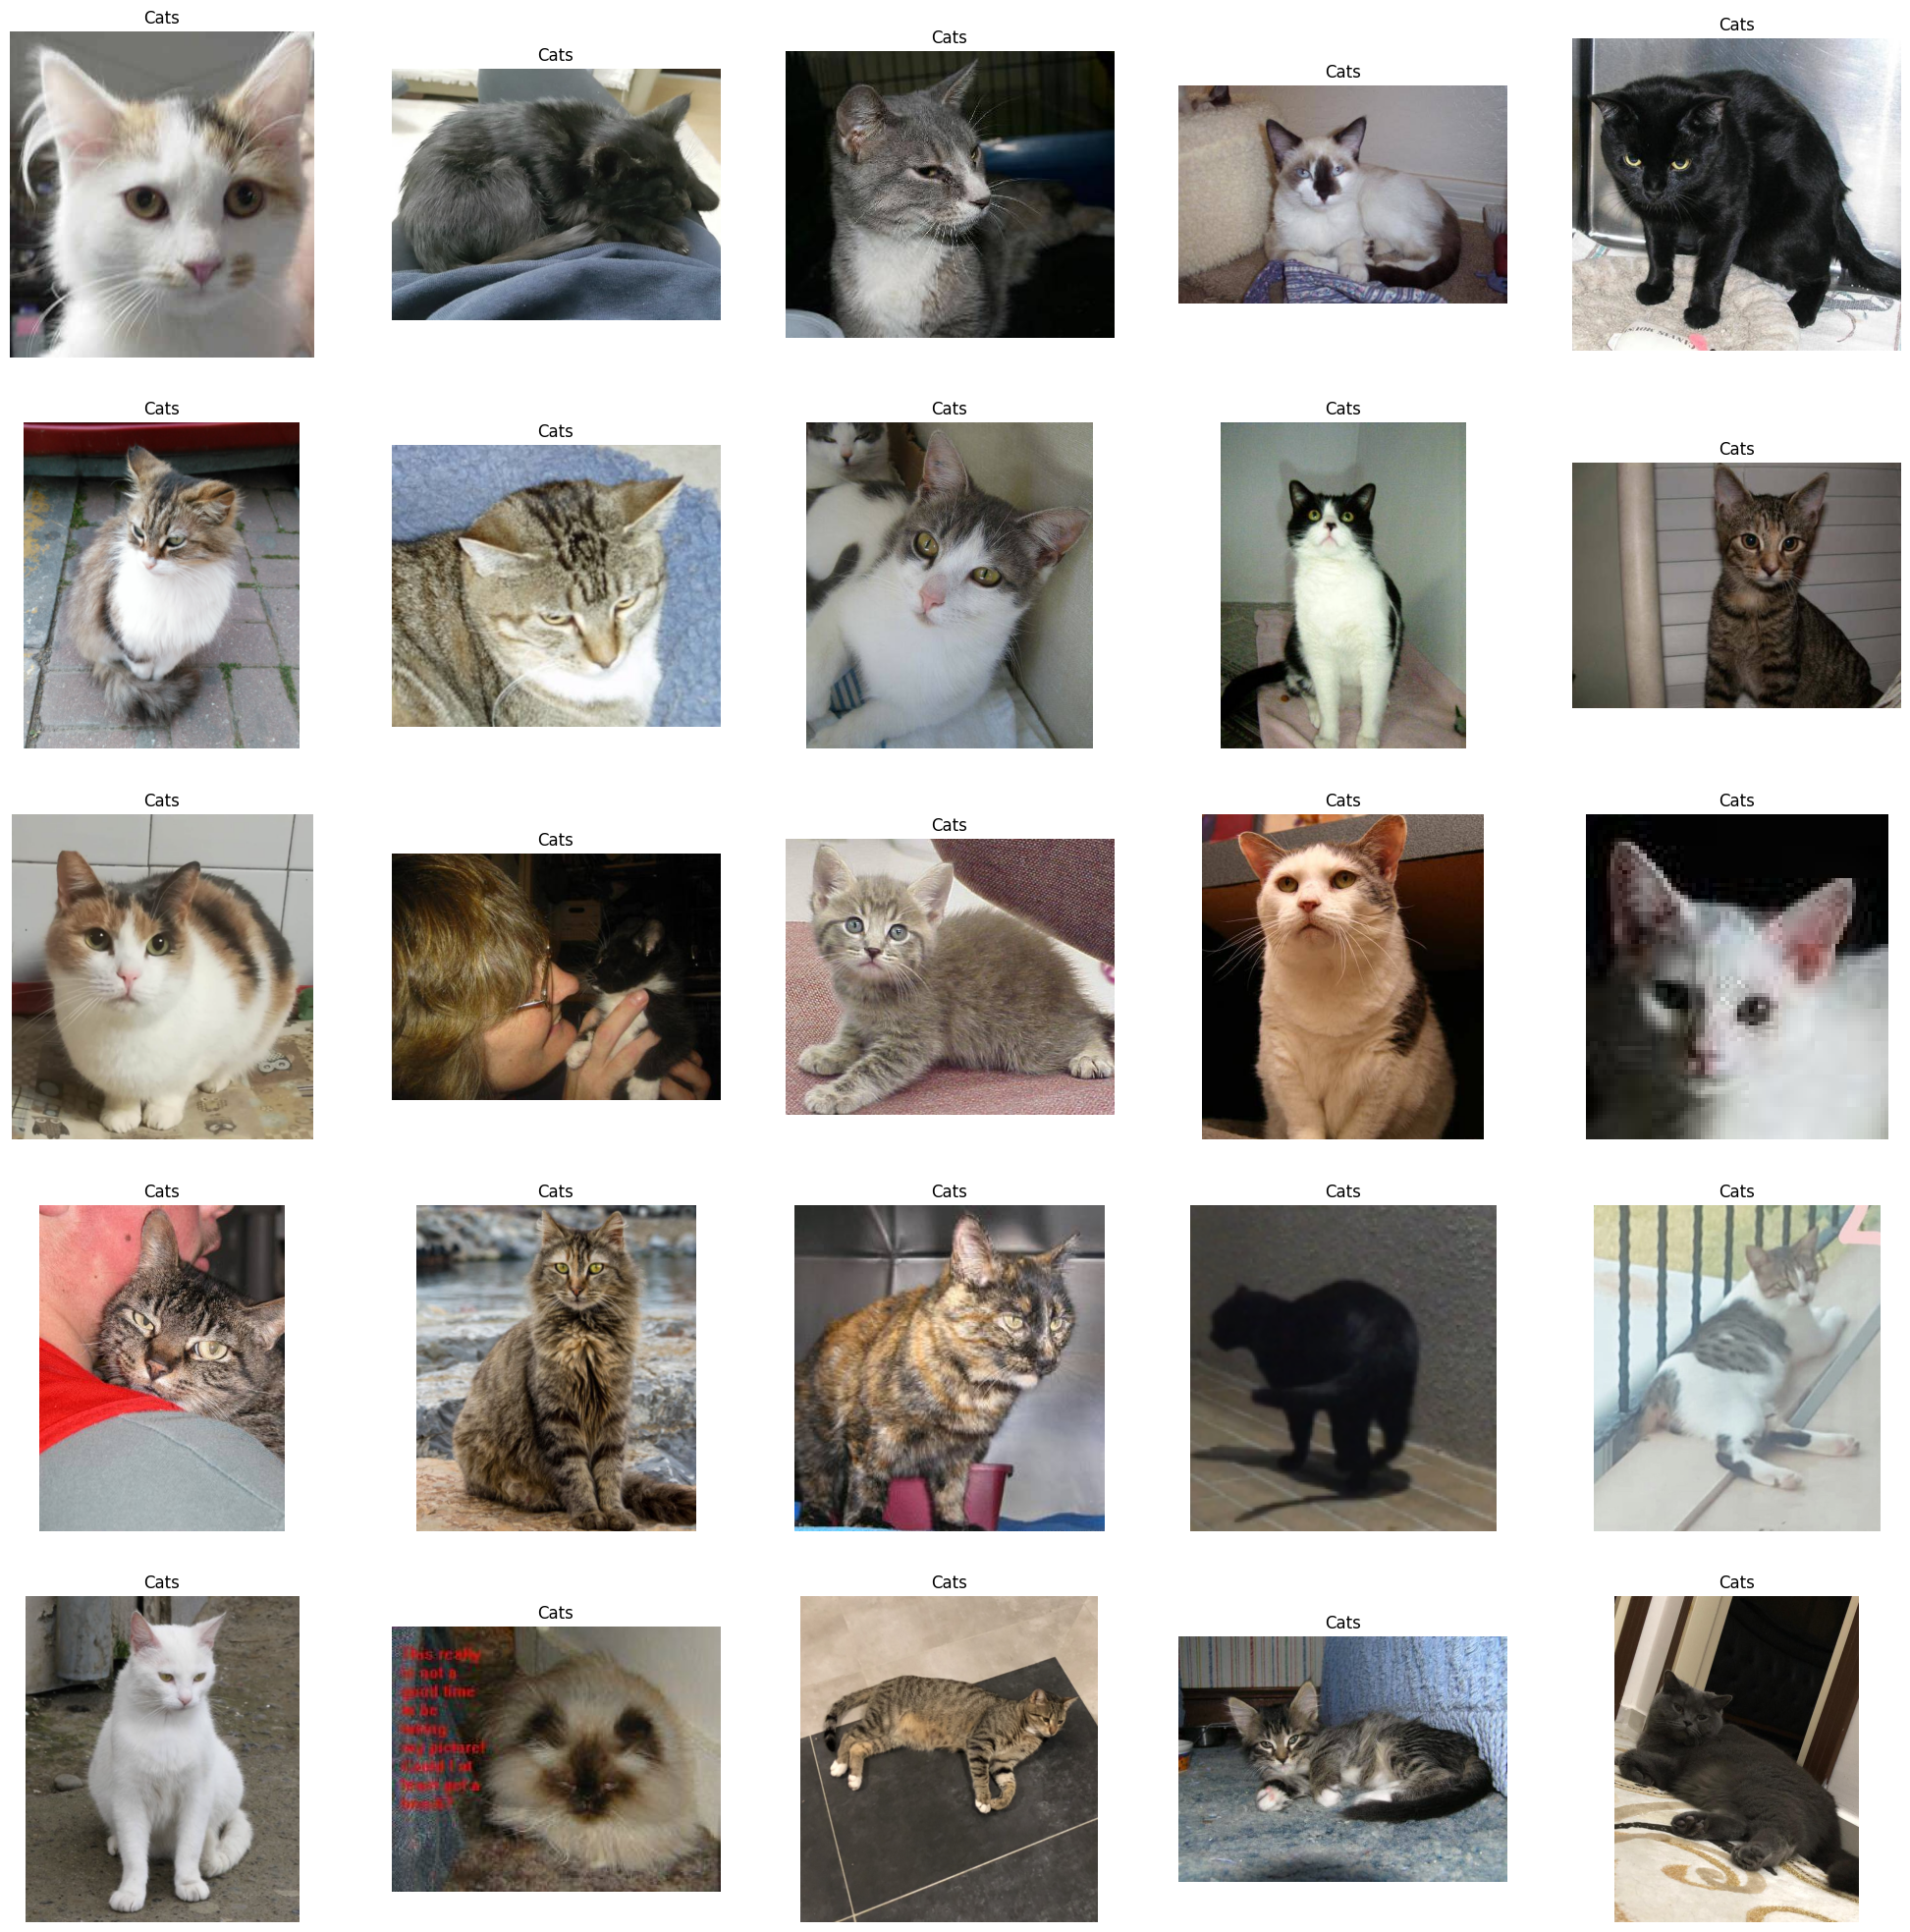

In [11]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

Creating DataGenerator for the Images

In [13]:
df['label'] = df['label'].astype('str')

In [14]:
df.head()

images label
0  /content/Dog and Cat .png/Cat/264.png     0
1  /content/Dog and Cat .png/Cat/244.png     0
2  /content/Dog and Cat .png/Dog/d35.png     1
3  /content/Dog and Cat .png/Cat/288.png     0
4  /content/Dog and Cat .png/Dog/d36.png     1

In [15]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 800 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


Model Creation

In [17]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [27]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
2/2 [==============================] - 12s 7s/step - loss: 0.6421 - accuracy: 0.6388 - val_loss: 0.6698 - val_accuracy: 0.5950
Epoch 2/10
2/2 [==============================] - 11s 3s/step - loss: 0.6359 - accuracy: 0.6662 - val_loss: 0.6766 - val_accuracy: 0.6000
Epoch 3/10
2/2 [==============================] - 11s 6s/step - loss: 0.6458 - accuracy: 0.6275 - val_loss: 0.6632 - val_accuracy: 0.6000
Epoch 4/10
2/2 [==============================] - 13s 5s/step - loss: 0.6218 - accuracy: 0.6637 - val_loss: 0.6609 - val_accuracy: 0.6200
Epoch 5/10
2/2 [==============================] - 17s 7s/step - loss: 0.6189 - accuracy: 0.6712 - val_loss: 0.6621 - val_accuracy: 0.6000
Epoch 6/10
2/2 [==============================] - 12s 7s/step - loss: 0.6305 - accuracy: 0.6488 - val_loss: 0.6513 - val_accuracy: 0.6250
Epoch 7/10
2/2 [==============================] - 11s 4s/step - loss: 0.6342 - accuracy: 0.6513 - val_loss: 0.6524 - val_accuracy: 0.6350
Epoch 8/10
2/2 [==================

Visualization

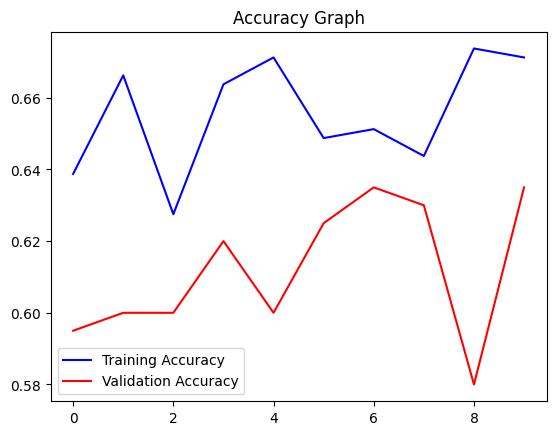

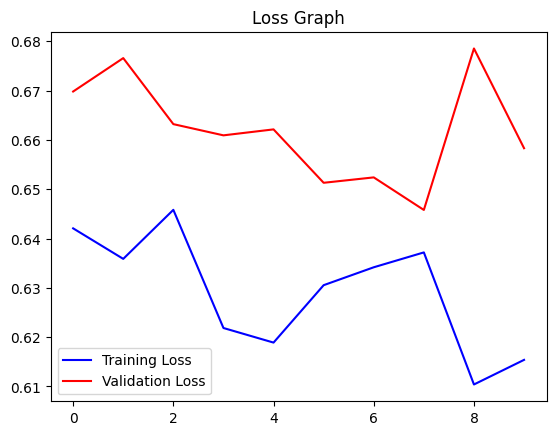

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Test with The Real Image

In [33]:
image_path = "/content/fluffy-ginger-kitten-standing-warren-photographic.jpg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)

1/1 [==============================] - 0s 20ms/step
Cat
